# Final Project Report

Shams Wardak, Igor Torrezan, Gregory Millan, Joseph Puchalla

## Introduction

## Method

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('CommandersFansInDMV.csv')

df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'CommandersFansInDMV.csv'

In [ ]:
df = pd.read_csv('CommandersFansInDMV.csv')

df = df.replace(',','', regex=True)
df = df.astype(int)

fig, ax = plt.subplots()

bar_width = 0.3

r1 = [0, 1, 2]
r2 = [x + bar_width for x in r1]

ax.bar(r1, [df.loc[0, 'Virginia Population'], df.loc[0, 'Maryland Population'], df.loc[0, 'Washington dc population']],
       color='#7f6d5f', width=bar_width, edgecolor='white', label='Total Population')

ax.bar(r2, [df.loc[0, 'Commanders fans in Virginia'], df.loc[0, 'Commanders fans in Maryland'], df.loc[0, 'Commanders fans in Washington dc']],
       color='#557f2d', width=bar_width, edgecolor='white', label='Commanders Fans')

ax.set_xticks([r + bar_width / 2 for r in range(len(r1))])
ax.set_xticklabels(['Virginia', 'Maryland', 'Washington DC'])
ax.set_xlabel('State')
ax.set_ylabel('Population in Millions')
ax.set_title('Total Population and Total Commanders Fans in Virginia, Maryland, and Washington DC')
ax.legend()

plt.show()

In [ ]:
df = pd.read_csv('CommandersFansInDMV.csv')

df = df.replace(',','', regex=True)

df['Virginia fans proportion'] = int(float(df['Commanders fans in Virginia'])) / int(float(df['Virginia Population']))
df['Maryland fans proportion'] = int(float(df['Commanders fans in Maryland'])) / int(float(df['Maryland Population']))
df['Washington DC fans proportion'] = int(float(df['Commanders fans in Washington dc'])) / int(float(df['Washington dc population']))

colors = ['tab:red', 'tab:blue', 'tab:green']

fig, ax = plt.subplots()
ax.bar(['Virginia', 'Maryland', 'Washington DC'],
       [df.loc[0, 'Virginia fans proportion'],
        df.loc[0, 'Maryland fans proportion'],
        df.loc[0, 'Washington DC fans proportion']],
       color=colors)
ax.set_ylabel('Proportion of Commanders fans')
ax.set_title('Proportions of Commanders fans in Virginia, Maryland, and Washington DC')
plt.show()

With the  results above, we found that it would be best to build the new stadium in Virginia, this is because, in Virginia,  the proportion of Commanders fans is relatively high while having the highest population. 

In [3]:
vacounty_df = pd.read_csv('virginia_county_data.csv')
vacounty_df.head()

,year,fips,pop2010,pop2023,state,stateCode,growthSince2010,name,ctyname,slug,landArea,density,StatePercentage,StateRank,densityMi,area
0,2023,51059,1081726,1170883,Virginia,VA,0.082421,Fairfax County,Fairfax County,fairfax-county-va,391,2994.585678,0.132717,1,2994.585678,391
1,2023,51153,402002,506264,Virginia,VA,0.259357,Prince William County,Prince William County,prince-william-county-va,336,1506.738095,0.057384,2,1506.738095,336
2,2023,51810,437994,465914,Virginia,VA,0.063745,Virginia Beach City County,Virginia Beach City County,virginia-beach-city-county-va,250,1863.656000,0.052810,3,1863.656000,250
3,2023,51107,312311,453554,Virginia,VA,0.452251,Loudoun County,Loudoun County,loudoun-county-va,516,878.980620,0.051409,4,878.980620,516
4,2023,51041,316236,379041,Virginia,VA,0.198602,Chesterfield County,Chesterfield County,chesterfield-county-va,423,896.078014,0.042964,5,896.078014,423


In [4]:
vacounty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             133 non-null    int64  
 1   fips             133 non-null    int64  
 2   pop2010          133 non-null    int64  
 3   pop2023          133 non-null    int64  
 4   state            133 non-null    object 
 5   stateCode        133 non-null    object 
 6   growthSince2010  133 non-null    float64
 7   name             133 non-null    object 
 8   ctyname          133 non-null    object 
 9   slug             133 non-null    object 
 10  landArea         133 non-null    int64  
 11  density          133 non-null    float64
 12  StatePercentage  133 non-null    float64
 13  StateRank        133 non-null    int64  
 14  densityMi        133 non-null    float64
 15  area             133 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 16.8+ KB


In [5]:
vacounty_df = vacounty_df.drop(['fips', 'stateCode', 'state', 'growthSince2010', 'name', 'slug','density', 'StatePercentage', 'StateRank', 'area'], axis=1)
vacounty_df

,year,pop2010,pop2023,ctyname,landArea,densityMi
0,2023,1081726,1170883,Fairfax County,391,2994.585678
1,2023,402002,506264,Prince William County,336,1506.738095
2,2023,437994,465914,Virginia Beach City County,250,1863.656000
3,2023,312311,453554,Loudoun County,516,878.980620
4,2023,316236,379041,Chesterfield County,423,896.078014
...,...,...,...,...,...,...
128,2023,5961,5671,Covington,5,1134.200000
129,2023,5190,4802,Craig County,330,14.551515
130,2023,4731,4053,Bath County,529,7.661626
131,2023,3958,3606,Norton,7,515.142857


In [6]:
vacounty_df = vacounty_df.sort_values('pop2023', ascending=True)
vacounty_df

,year,pop2010,pop2023,ctyname,landArea,densityMi
132,2023,2321,2205,Highland County,415,5.313253
131,2023,3958,3606,Norton,7,515.142857
130,2023,4731,4053,Bath County,529,7.661626
129,2023,5190,4802,Craig County,330,14.551515
128,2023,5961,5671,Covington,5,1134.200000
...,...,...,...,...,...,...
4,2023,316236,379041,Chesterfield County,423,896.078014
3,2023,312311,453554,Loudoun County,516,878.980620
2,2023,437994,465914,Virginia Beach City County,250,1863.656000
1,2023,402002,506264,Prince William County,336,1506.738095


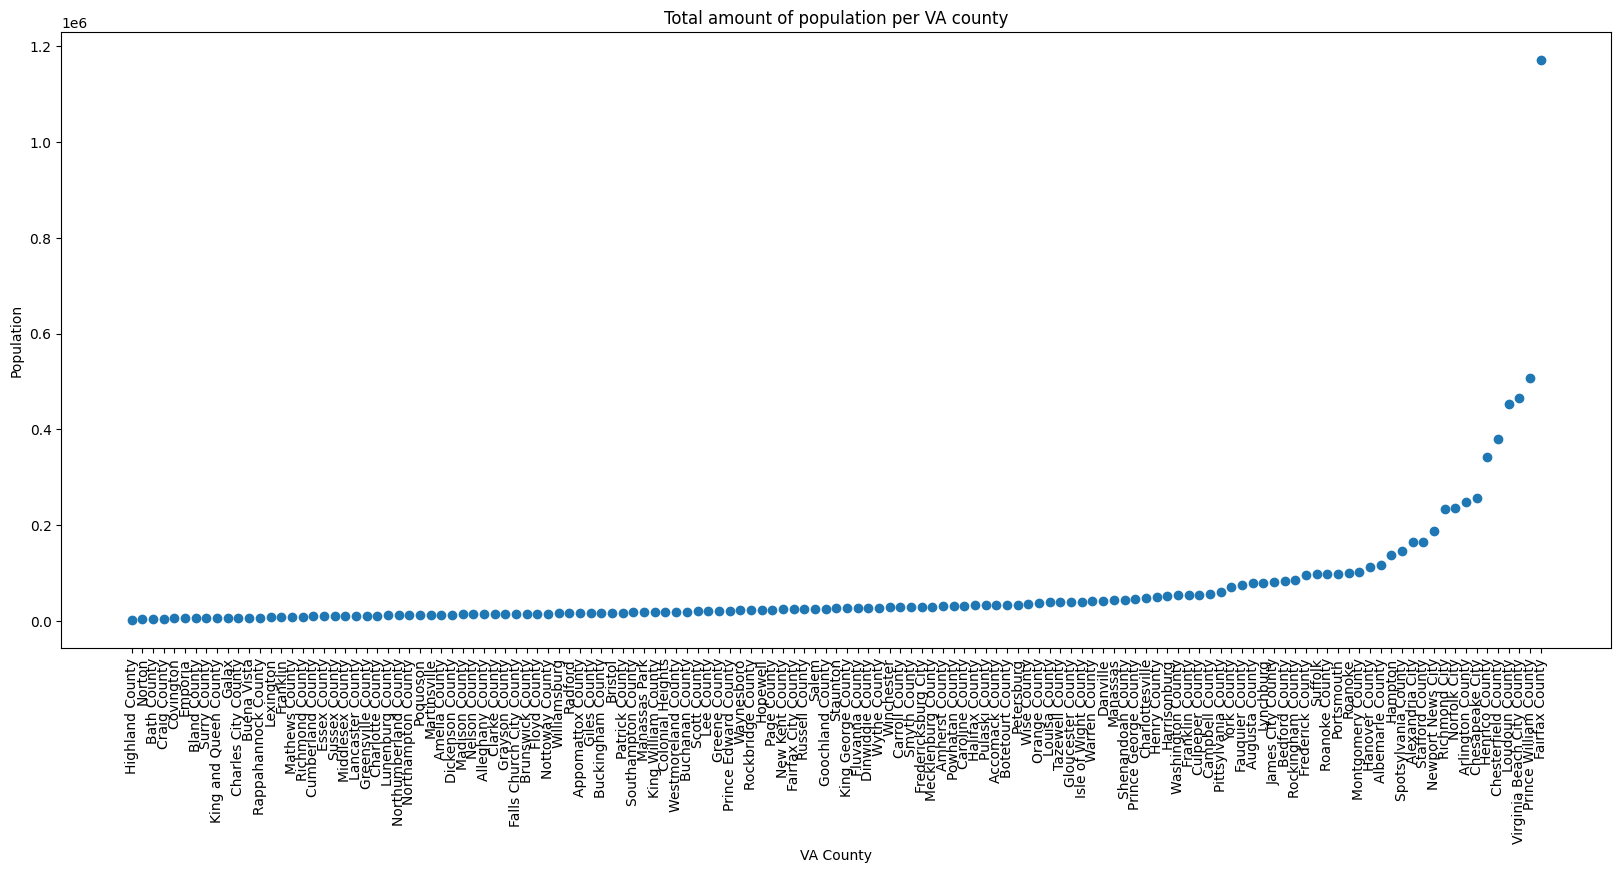

In [7]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(vacounty_df.ctyname, vacounty_df.pop2023)

ax.set_xlabel('VA County')
ax.set_ylabel('Population')
ax.set_title('Total amount of population per VA county')

plt.xticks(rotation = 90)
plt.show()

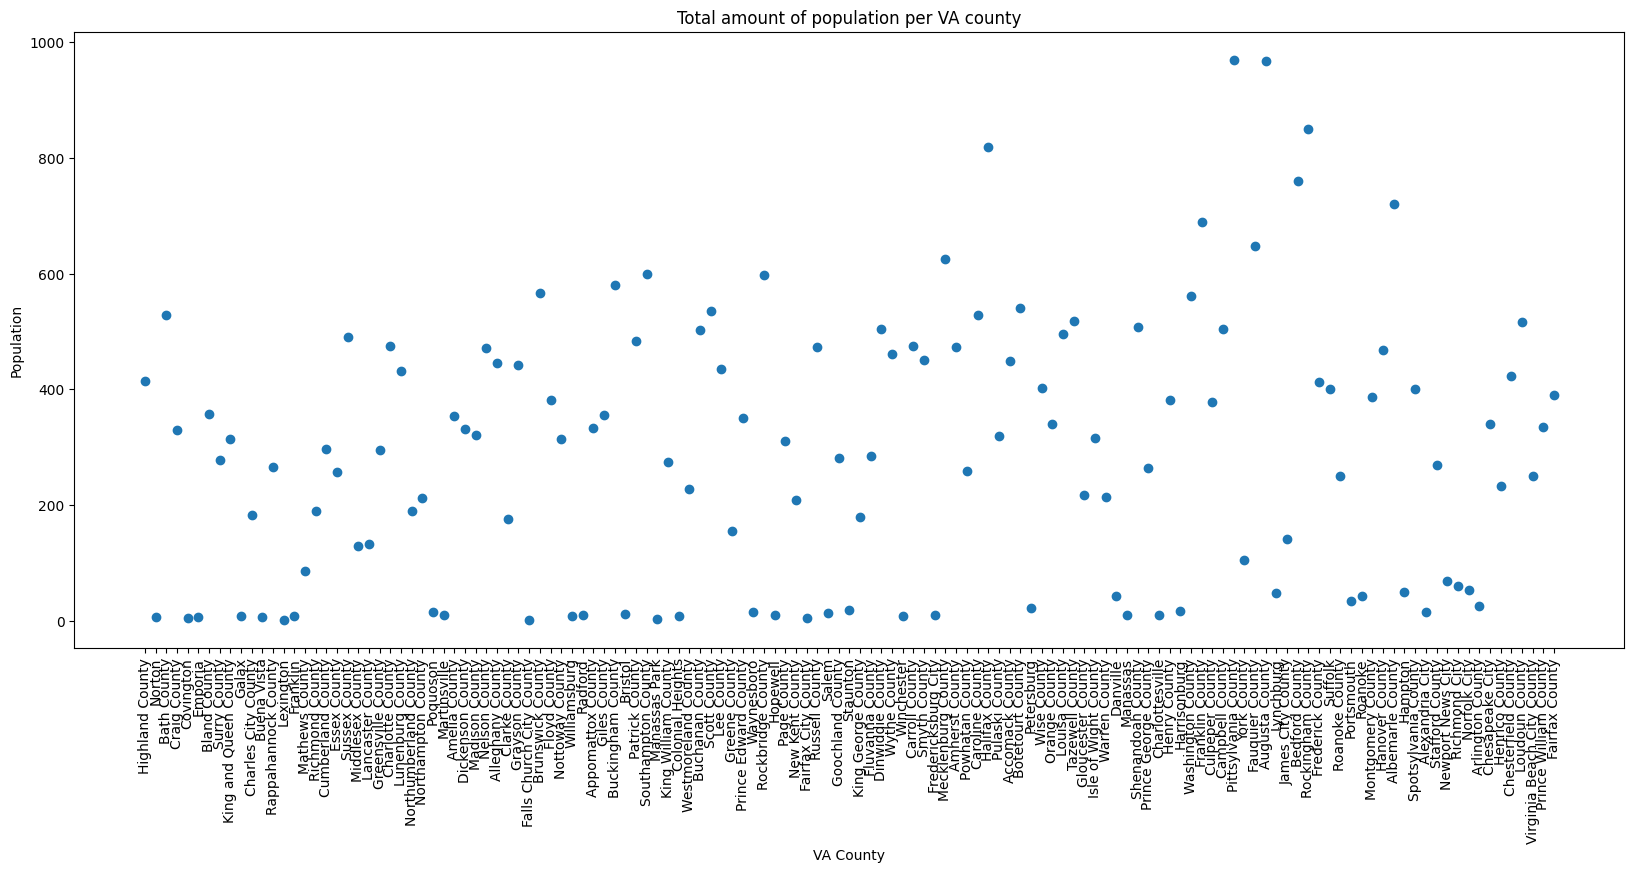

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(vacounty_df.ctyname, vacounty_df.landArea)

ax.set_xlabel('VA County')
ax.set_ylabel('Population')
ax.set_title('Total amount of population per VA county')

plt.xticks(rotation = 90)
plt.show()

From the results above, we found that it would be best to build the stadium in Fairfax County. This is because they have the highest population. It also helps that Fairfax County is close to Washington DC.Other potential locations could be Prince Williams County or Arlington County. 

Now that we know a good general location to build the stadium, lets take a look at the average acerage of NFL Stadiums. 

In [ ]:
stadiums_df = pd.read_csv('nfl_stadiums.csv')
stadiums_df.head()

,Team,Stadium,Acreage
0,Los Angeles Chargers,SoFi Stadium,298
1,Los Angeles Rams,SoFi Stadium,298
2,Washington Commanders,FedExField,207
3,Las Vegas Raiders,Allegiant Stadium,62
4,Dallas Cowboys,AT&T Stadium,73


C:\Users\Shams\AppData\Local\Temp\ipykernel_31276\380778386.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_df['Stadium'], rotation=90)
C:\Users\Shams\AppData\Local\Temp\ipykernel_31276\380778386.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(x) for x in ax.get_yticks()])


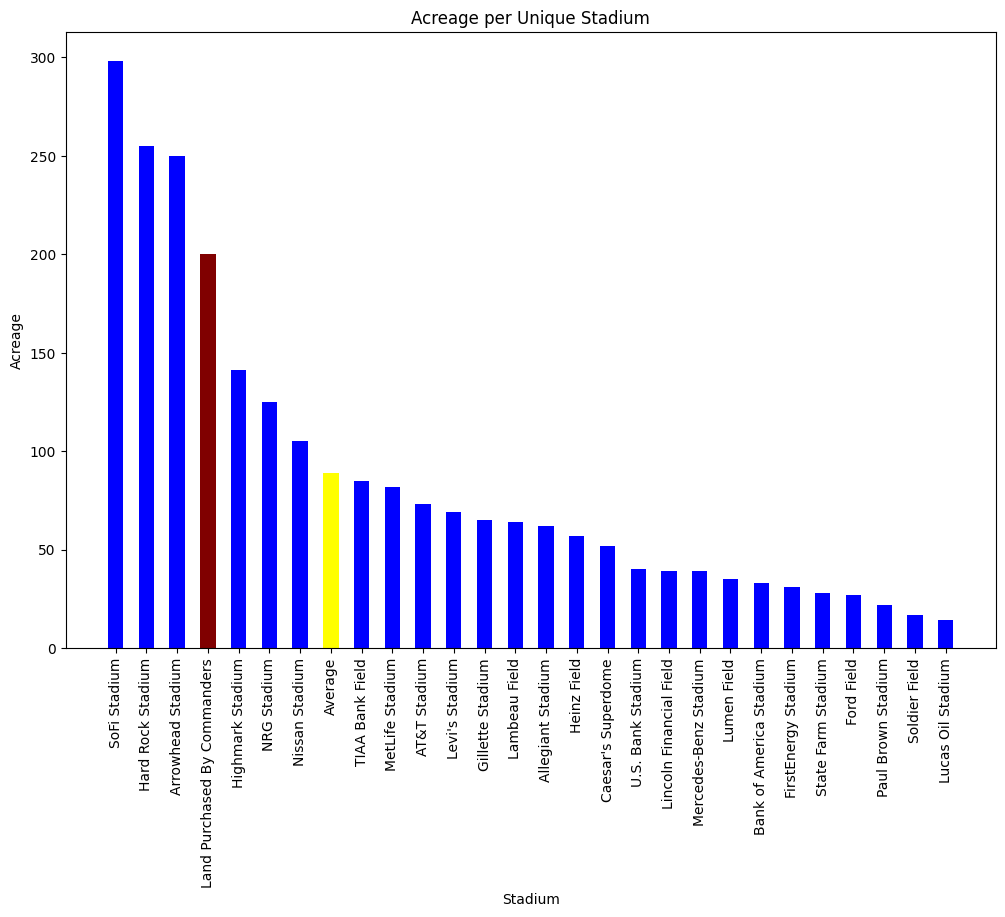

In [ ]:

# Calculate the average acreage
average_acreage = stadiums_df[stadiums_df['Team'] != 'Washington Commanders']['Acreage'].mean()
stadiums_df = stadiums_df[stadiums_df['Stadium'] != 'FedExField']
stadiums_df = stadiums_df[stadiums_df['Team'] != 'Los Angeles Chargers']
stadiums_df = stadiums_df[stadiums_df['Team'] != 'New York Jets']
# Add a column for the number of stadiums
stadiums_df['Stadium Count'] = 1

# Group the DataFrame by stadium and team and calculate the total acreage and number of stadiums
grouped_df = stadiums_df.groupby(['Stadium', 'Team'], as_index=False).agg({'Acreage': 'sum', 'Stadium Count': 'sum'})

# Calculate the average acreage per stadium
grouped_df['Average Acreage'] = grouped_df['Acreage'] / grouped_df['Stadium Count']

# Add a row for the average acreage
average_row = pd.DataFrame({'Stadium': 'Average', 'Acreage': average_acreage, 'Stadium Count': ''}, index=[len(grouped_df)])
grouped_df = pd.concat([grouped_df, average_row], ignore_index=True)

# Add row for new purchase 
new_purchase = pd.DataFrame({'Stadium': 'Land Purchased By Commanders', 'Acreage': 200, 'Stadium Count': ''}, index=[len(grouped_df)])
grouped_df = pd.concat([grouped_df, new_purchase], ignore_index=True)

# Sort the DataFrame by acreage in descending order
sorted_df = grouped_df.sort_values(by=['Acreage'], ascending=False)

# Create a vertical bar chart
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(sorted_df['Stadium'], sorted_df['Acreage'], color='blue', width=0.5)
ax.bar('Land Purchased By Commanders', 200, color='maroon', width=0.5)
ax.bar('Average', average_acreage, color='yellow', width=0.5)
ax.set_xlabel('Stadium')
ax.set_ylabel('Acreage')
ax.set_title('Acreage per Unique Stadium')
ax.set_xticklabels(sorted_df['Stadium'], rotation=90)
ax.set_yticklabels([int(x) for x in ax.get_yticks()])
plt.show()

We found that the average NFL stadium takes up to 70 acres.

Now, lets take a look at potential sites/available land properties near DC. We will use data of 18 different land properties with considerable land size to build an NFL stadium. 

In [8]:
land_df = pd.read_csv('available_land_data.csv')
land_df


,State,County,City,Address,Acres,Type,distance_from_dc
0,VA,Fairfax County,Oakton,10728 Vale Rd,23.69,undeveloped,20.8
1,VA,Fairfax County,Great Falls,10509 Beach Mill Rd,21.24,residential,21.5
2,MD,Prince George's County,Fort Washington,11308-11406 Indian Head Highway,30.70,residential,15.2
3,VA,Fairfax County,Great Falls,Utterback Shore Rd,68.78,undeveloped,21.3
4,VA,Loudoun County,Leesburg,James Monroe Hwy,371.80,undeveloped,39.5
5,VA,Fairfax County,Great Falls,439 A Springvale Rd,50.03,undeveloped,20.7
6,VA,Loudoun County,Leesburg,22485 Evergreen Mills Road,68.04,undeveloped,35.1
7,VA,Loudoun County,Leesburg,Loyalty Road,140.48,undeveloped,49.8
8,VA,Prince William County,Nokesville,9950 Alydar Ct,73.20,residential,42.9
9,VA,Prince William County,Manassas,12405 PURCELL ROAD,40.81,undeveloped,33.8


Here we read in the available land data and displayed it to get a general sense of what kind of information we have.

In [13]:
#Since we found that Virginia would be the best state to build the stadium, lets only include sites in Virginia
land_va_df = land_df.loc[land_df['State'] == "VA"]
land_va_df

,State,County,City,Address,Acres,Type,distance_from_dc
0,VA,Fairfax County,Oakton,10728 Vale Rd,23.69,undeveloped,20.8
1,VA,Fairfax County,Great Falls,10509 Beach Mill Rd,21.24,residential,21.5
3,VA,Fairfax County,Great Falls,Utterback Shore Rd,68.78,undeveloped,21.3
4,VA,Loudoun County,Leesburg,James Monroe Hwy,371.80,undeveloped,39.5
5,VA,Fairfax County,Great Falls,439 A Springvale Rd,50.03,undeveloped,20.7
6,VA,Loudoun County,Leesburg,22485 Evergreen Mills Road,68.04,undeveloped,35.1
7,VA,Loudoun County,Leesburg,Loyalty Road,140.48,undeveloped,49.8
8,VA,Prince William County,Nokesville,9950 Alydar Ct,73.20,residential,42.9
9,VA,Prince William County,Manassas,12405 PURCELL ROAD,40.81,undeveloped,33.8
10,VA,Prince William County,Manassas,10528 PINEVIEW ROAD,45.74,undeveloped,34.6


Here, we filtered the data to only include properties in Virginia becasue we previously decided that based on our fan proportion data, Virginia would be the best fit for a new stadium. The resulting dataframe included 10 locations.

In [15]:
#Merge the land dataframe with the county dataframe to list the population
merged_df = pd.merge(land_va_df, vacounty_df[['ctyname', 'pop2023']], left_on='County', right_on='ctyname')
merged_df.drop('ctyname', axis=1, inplace=True)
merged_df

,State,County,City,Address,Acres,Type,distance_from_dc,pop2023
0,VA,Fairfax County,Oakton,10728 Vale Rd,23.69,undeveloped,20.8,1170883
1,VA,Fairfax County,Great Falls,10509 Beach Mill Rd,21.24,residential,21.5,1170883
2,VA,Fairfax County,Great Falls,Utterback Shore Rd,68.78,undeveloped,21.3,1170883
3,VA,Fairfax County,Great Falls,439 A Springvale Rd,50.03,undeveloped,20.7,1170883
4,VA,Loudoun County,Leesburg,James Monroe Hwy,371.80,undeveloped,39.5,453554
5,VA,Loudoun County,Leesburg,22485 Evergreen Mills Road,68.04,undeveloped,35.1,453554
6,VA,Loudoun County,Leesburg,Loyalty Road,140.48,undeveloped,49.8,453554
7,VA,Prince William County,Nokesville,9950 Alydar Ct,73.20,residential,42.9,506264
8,VA,Prince William County,Manassas,12405 PURCELL ROAD,40.81,undeveloped,33.8,506264
9,VA,Prince William County,Manassas,10528 PINEVIEW ROAD,45.74,undeveloped,34.6,506264


In order to help decide which location would be best, we decided that we would use three factors to determine where the new stadium would be built. Those three factors are the population of the county, the acerage, and the distance from Washington DC. In this dataset, we already have the acerage and the distance from DC. In order to get the population, we would need to merge this dataframe and the VA counties dataframe to incldue the population. We used the merge function from pandas to do combine the dataframes to our liking. 

Using multi-criteria decision analysis to find the best location

We found that the stadium should be based on three main factors: the population of the county, the acerage, and the distance from DC

In [49]:
#Set weights to show how important each chosen factor is to a new location
weight_pop = 0.5
weight_acres = 0.3
weight_distance = 0.2

#Calculate a score for each based on the weights
merged_df['score'] = (weight_pop * merged_df['pop2023']) + (weight_acres * merged_df['Acres']) + (weight_distance * (1 - merged_df['distance_from_dc']))

Here, we set the weights or level of importance of each factor in this decision. We decided that the population would be the most important, the acerage being the second most important, and the distance from dc as the least important. After setting the weights, we calculated a score for each location by multipying the weight we set by the value in each column/factor. For the distance from dc, we prefer the smaller number. Therefore, we made it negative by doing 1 - distance_from_dc before multiplying it by the weight.

In [51]:
#Sort the dataframe in order to see the best locations based on our calculated score 
merged_df_sorted = merged_df.sort_values(by='score', ascending=False)
merged_df_sorted

Here, we sorted the dataframe in order by score. This is to get an idea of the most suitable locations in order. 

In [53]:
#Calculate the best location
best_location = merged_df_sorted.iloc[0]
best_location

State                               VA
County                  Fairfax County
City                       Great Falls
Address             Utterback Shore Rd
Acres                            68.78
Type                       undeveloped
distance_from_dc                  21.3
pop2023                        1170883
score                       585458.074
Name: 2, dtype: object

Here, we found that the most suitable location would be in Fairfax County, Virginia. This piece of land is in the preffered county that we found would be best suitable. The land has 68.78 acres; which is perfect because it is right on the NFL average for a typical NFL Stadium including parking and other ammenities. It is also only 21.3 miles from DC.

## Discussion 

## Limitations

## Conclusion